In [2]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings;

 Activating environment at `~/Workspace/NodaLab/Scripts/Conduction/Project.toml`


In [9]:
range = -10.:0.5:10.;

semiconductor = Conduction.Semiconductor(
1.38 * 10^-23, # Boltzman constant (J.K^-1)
1.6*10^-19, # Electron's charge (C)
10^7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6*10^-19, # Mode effect of the phonons (J)
2.1 * 10^18, # intrinsic semiconductor's density (cm^-3)
2.1 * 10^18, # Doping states' density (cm^-3)
0.1 * 1.6 * 10^-19, # Energy to a vacant target site (J)
-2*10^5, # Field (V.cm^-1)
10^13, # Base electron jump rate
-10.0, # Fermi level (J)
2.7, # Intrinsic semiconductor's gaussian width (J)
2.7 # Doping states' gaussian width (J)
);

res = (function (x)
    r = Conduction.RnnVRH(semiconductor, x, 300);
    return r^2 / (6 * (2 * semiconductor.alpha)^2) * semiconductor.nu * exp(-r)
end).(range);

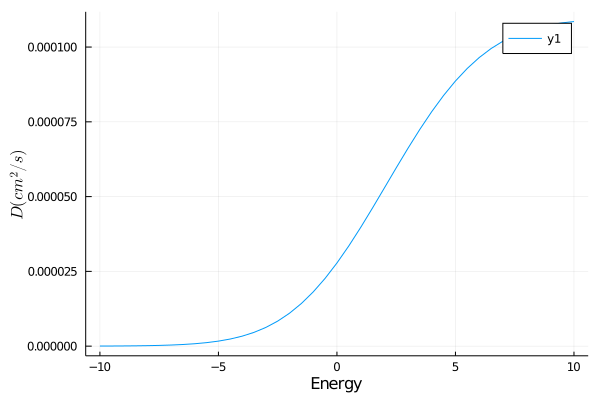

In [40]:
plot(range, res, xlabel="Energy", ylabel=L"$D (cm^2 / s)$")